### features:
* selected spectogram coef
* zero crossing rate
* selected chromogram values
* selected tempogram values
* wavelet of level 0

In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
import itertools

In [3]:
csv_path = "/Users/ecem/Desktop/gyrocardiogram/s-vs-r/feature_extr"

## Load data

Here, our target is to predict disease correctly. So; our y will be disease column of  dataset

In [4]:
features = pd.read_csv(csv_path + "/pvs_features.csv", index_col = 0)

In [5]:
features

,freq_x0,freq_y0,freq_z0,freq_x1,freq_y1,freq_z1,freq_x2,freq_y2,freq_z2,freq_x3,...,tempogram_y375,tempogram_z375,tempogram_x376,tempogram_y378,tempogram_x379,tempogram_x380,tempogram_y380,tempogram_z381,tempogram_x383,tempogram_z383
0,0.003427,0.005127,0.005676,0.006353,0.007078,0.007797,0.008472,0.009078,0.009610,0.010098,...,1.108203e-16,-7.966920e-17,8.652207e-17,8.460028e-17,4.793528e-17,-7.342808e-17,1.225806e-16,7.287456e-18,6.834938e-17,7.931318e-17
1,0.005258,0.007622,0.007945,0.008296,0.008626,0.008910,0.009148,0.009371,0.009616,0.009921,...,1.003295e-16,-5.089804e-17,8.669303e-17,8.461696e-17,4.613281e-17,-6.833124e-17,1.096995e-16,-2.261701e-17,3.045813e-17,3.495226e-17
2,0.007979,0.011349,0.011402,0.011404,0.011338,0.011200,0.010997,0.010755,0.010524,0.010372,...,8.736653e-17,-6.296430e-17,3.146694e-17,7.584340e-17,4.726023e-17,-8.535312e-17,9.018797e-17,-3.607681e-17,3.603653e-17,1.534569e-17
3,0.003781,0.005553,0.005987,0.006505,0.007040,0.007551,0.008016,0.008439,0.008825,0.009131,...,1.050892e-16,-5.537199e-17,5.913430e-17,6.606520e-17,5.239825e-17,-7.228599e-17,1.088708e-16,-2.105228e-17,3.316986e-17,5.345955e-17
4,0.009495,0.013529,0.013682,0.013810,0.013878,0.013879,0.013838,0.013796,0.013739,0.013616,...,1.072743e-16,-4.448243e-17,1.077766e-16,8.503681e-17,5.810262e-17,-2.140661e-17,1.385636e-16,1.104246e-17,2.218287e-17,6.928964e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,0.005453,0.007844,0.008084,0.008326,0.008522,0.008645,0.008687,0.008651,0.008561,0.008455,...,1.303250e-16,-4.463210e-17,9.520611e-17,1.022357e-16,7.476991e-17,-3.813720e-17,1.271035e-16,8.043375e-19,2.792773e-17,7.774306e-17
3083,0.005401,0.007962,0.008597,0.009344,0.010111,0.010841,0.011494,0.012073,0.012587,0.012953,...,9.797766e-17,-1.014296e-16,9.929731e-17,8.534983e-17,3.960912e-17,-1.452922e-16,1.285608e-16,-5.316193e-17,4.782281e-17,3.345765e-17
3084,0.018487,0.027552,0.030742,0.034638,0.038720,0.042704,0.046408,0.049736,0.052701,0.055224,...,3.775580e-18,-1.890544e-18,-7.409979e-18,-2.278589e-17,-5.545941e-18,-1.291960e-18,9.044308e-18,-8.325591e-18,2.378641e-19,-2.528807e-18
3085,0.249094,0.351497,0.349080,0.344997,0.339428,0.332734,0.325438,0.318325,0.312635,0.308642,...,9.531123e-17,-1.168919e-16,7.329449e-17,6.101498e-17,-2.390456e-19,-1.186333e-16,8.701563e-17,-7.320334e-17,2.646363e-17,1.065572e-17


In [9]:
y = np.concatenate( [np.ones((1070)), np.zeros((2017))] )

In [10]:
y.shape

(3087,)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(features, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [12]:
import xgboost as xgb
model  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror') 

# Fit the model
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X_valid)

In [18]:
classes = ['S', 'R']

In [ ]:
rocauc = ROCAUC(model, size=(900, 500), classes=classes )

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

In [ ]:
report = ClassificationReport(model, size=(425, 400), classes=classes, cmap = 'BuPu' )

report.score(X_valid, y_valid)
c = report.poof()

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
conf =  ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid, display_labels= ['S', 'R'], cmap = 'BuPu') 
conf.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("accuracy: %.2f%%" % (accuracy * 100.0))

recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

### with 0.0001 variation

In [13]:
vt = VarianceThreshold(threshold = 1)
_ = vt.fit(features)
masked = vt.get_support()
features_masked = features.loc[:, masked]
features_masked # uncomment to see the dataframe

,freq_z629,freq_x630,freq_y630,freq_z630,freq_x631,freq_y631,freq_z631,freq_x632,freq_y632,freq_z632,...,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,#ofcrossing_x,#ofcrossing_z
0,0.033367,0.033412,0.033512,0.033877,0.034379,0.034838,0.035241,0.035639,0.036212,0.036994,...,3.398055,1.683546,1.953521,1.884336,3.337115,2.892143,2.902176,3.054463,347.0,472.0
1,0.018011,0.018403,0.018775,0.019186,0.019671,0.020109,0.020487,0.020842,0.021282,0.021950,...,2.596833,2.536577,1.353387,1.348864,1.567292,1.382271,1.446645,1.549479,346.0,419.0
2,0.026340,0.026339,0.026161,0.025917,0.025758,0.025673,0.025733,0.026251,0.027284,0.028744,...,3.626036,3.209004,-0.134956,1.253442,0.246203,0.389060,0.444405,0.397022,421.0,423.0
3,0.030205,0.031733,0.032864,0.033618,0.034039,0.034008,0.033531,0.032654,0.031462,0.030159,...,2.162382,0.332423,2.512636,1.868316,1.286057,1.486791,1.487241,1.411369,374.0,476.0
4,0.018558,0.018568,0.019096,0.020068,0.021173,0.022260,0.023384,0.024494,0.025540,0.026634,...,3.117626,2.255243,1.461551,1.337653,3.555023,3.041664,2.981505,3.120505,413.0,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,0.076804,0.077535,0.077961,0.077919,0.077418,0.076580,0.075598,0.074867,0.075181,0.077390,...,-0.055524,-0.206653,-0.175639,-0.956635,-0.977654,-0.954696,-0.949013,-0.922854,132.0,93.0
3083,0.348337,0.335673,0.322547,0.309316,0.296399,0.284844,0.278048,0.277889,0.283984,0.296712,...,-0.074291,0.619744,0.322873,0.318044,-0.032990,0.007116,0.036962,0.042782,198.0,125.0
3084,3.931467,3.899789,3.882497,3.867401,3.854416,3.847362,3.851272,3.875234,3.998078,4.118739,...,0.130729,-0.542842,-0.112488,-0.638902,-1.010991,-0.917975,-0.897326,-0.906142,112.0,107.0
3085,5.969404,6.046803,6.093212,6.118587,6.242053,6.377128,6.506343,6.597547,6.638734,6.622892,...,-0.118549,0.329681,-0.059718,0.213193,0.465949,0.449462,0.418689,0.400873,134.0,122.0


In [14]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [15]:
import xgboost as xgb
model_  = xgb.XGBClassifier(random_state = 42, eval_metric = 'merror' ) 

# Fit the model
model_.fit(X_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
predictions_ = model_.predict(X_valid_)

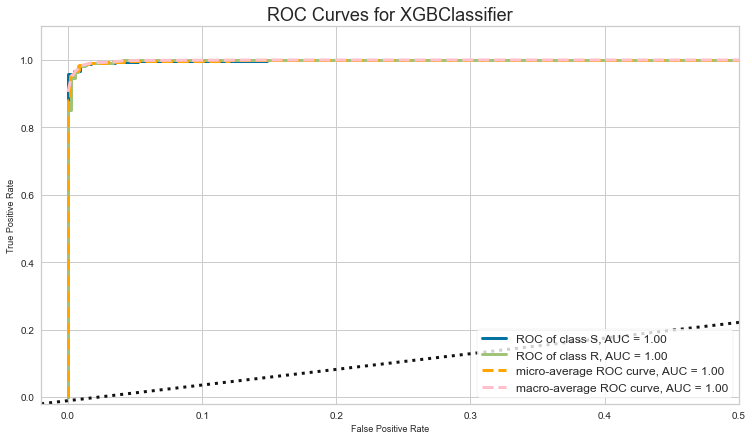

In [19]:
rocauc_ = ROCAUC(model_, size=(900, 500), classes=classes)

rocauc_.fit(X_train_, y_train_)       
rocauc_.score(X_valid_, y_valid_)  
r = rocauc_.poof()

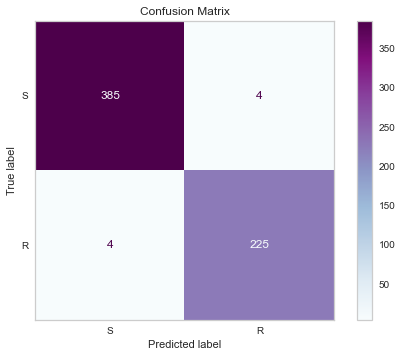

In [24]:
conf_ =  ConfusionMatrixDisplay.from_estimator(model_, X_valid_, y_valid_, display_labels= ['S','R' ], cmap = 'BuPu')   
conf_.ax_.set_title("Confusion Matrix")
plt.grid(None)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, predictions_)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.71%


In [26]:
recall = recall_score(y_valid_, predictions_, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid_, predictions_, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

recall: 98.71%
precision: 98.71%
